# Lab 3: Clustering, Association Rules, or Recommenders

- Name 1: Jasmine Coleman
- Name 2: Yat Leung
- Name 3: Karen Somes

## Business Understanding  

__Purpose of Dataset:__ 

These data were collected to understand host/guest transactions on the AirBnb website to ensure that AirBnb is successful. AirBnb succeeds when the users succeed and consequentially continue to partake in business on the site. Ultimately, this means the key focus of the users, or hosts, is to make money. They do so by understanding market demand in their location, drivers of customer satisfaction, and important accomodation characteristics to make their listing the most attractive and profitable. The 60 variables in this dataset provide key information to understand the AirBnb market.

Furthermore, implementing cluster analysis on these data will allow hosts to gain a better understanding of their typical customer and competing listings in their market. For example, if a host wants to increase their listing price, they will understand the characteristics of accommodations they would need for listings in a higher price range. If they want better review scores, they can look at clusters with high review scores to view the features that are associated with high reviews. 

__Measuring Effectiveness:__ 

 -  How will you measure the effectiveness of a good algorithm?

__Value of Validation Measure:__ 

 - Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?

### Data Understanding:  
 
#### Data description
__accomodates:__ The maximum number of people the rental can accomodate *(numeric)*  
__availability_60:__ Number of days the space is available within the next 60 days *(numeric)*  
__bathrooms:__ The number of bathrooms in the rental *(numeric)*  
__bed_type:__ The type of bed available *(categorical)*  
__bedrooms:__ The number of separate bedrooms in the rental *(numeric)*  
__beds:__ The number of beds in the rental *(numeric)*  
__calculated_host_listings_count_entire_homes:__ Number of listings a host has where an entire home is offered *(numeric)*  
__calculated_host_listings_count_private_rooms:__ Number of listings a host has with private rooms offered *(numeric)*  
__calendar_last_scraped:__ Date the calendar information was last pulled *(date)*  
__calendar_updated:__ Last time the host updated their calendar information *(date)*  
__cancellation_policy:__ Ranking of how strict the host is on their cancellation policy *(categorical)*  
__city:__ The city/borough the listing is located in *(categorical)*  
__cleaning_fee:__ The surcharge for cleaning the listing *(numeric)*  
__extra_people:__ The surcharge for each additional person staying in the rental *(numeric)*  
__first_review:__ The date of the first review of the listing *(date)*  
__guests_included:__ The number of guests included in the price *(numeric)*  
__host_has_profile_pic:__ Indicator of presence of profile picture on site *(Boolean)*  
__host_id:__ Host identifier *(numeric)*  
__host_identity_verified:__ Indicator of host's identity verification using offline source *(Boolean)*  
__host_is_superhost:__ Indicator of super host status (exemplary host behavior) *(Boolean)*  
__host_listings_count:__ The number of listings the host has *(numeric)*  
__host_location:__ The city the host is located in *(categorical)*  
__host_name:__ Name of host *(categorical)*  
__host_neighborhood:__ The neighborhood the host is located in *(categorical)*  
__host_response_rate:__ The rate which a host responds to contact from lessor *(numeric)*  
__host_response_time:__ Bucket of how long the host takes to respond *(categorical)*  
__host_since:__ The date of the first hosting *(date)*  
__host_verifications:__ Ways in which the host was verified *(categorical)*  
__instant_bookable:__ Indicator on ability to book instantly *(Boolean)*  
__is_location_exact:__ Indicator on if location is exact *(Boolean)*  
__last_review:__ Date the last review of the listing occured *(date)*  
__latitude:__ Latitude of the listing *(numeric)*  
__longitude:__ Longitude of the listing *(numeric)*  
__market:__ The market the listing is in (i.e., Adirondacks, NYC) *(categorical)*  
__maximum_nights:__ The maximum number of consecutive days the listing is available *(numeric)*  
__minimum_nights:__ The minimum number of days the place can be rented *(numeric)*  
__name:__ Given name of the listing *(categorical)*  
__neighborhood:__ The neighborhood the listing is located in *(categorical)*  
__number_of_reviews__: The number of reviews on a listing *(numeric)*  
__number_of_reviews_ltm:__ The number of reviews on a long term listing *(numeric)*  
__price:__ The nightly price of a listing *(numeric)*  
__property_type:__ The residence type of the listing *(numeric)*  
__require_guest_phone_verification:__ Indicator on whether phone verification of guest is requied *(Boolean)*  
__require_guest_profile_picture:__  Indicator on whether host requires guest to post profile picture *(Boolean)*  
__review_scores_accuracy:__ The average rating of all guests on the accuracy of the listing's description *(numeric)*  
__review_scores_checkin:__ The average rating of guests' review of the check in process *(numeric)*  
__review_scores_cleanliness:__ The average rating of guests' review of cleanliness *(numeric)*  
__review_scores_communication:__ The average rating of guests' review on host communication *(numeric)*  
__review_scores_location:__ The average rating of guests' review of listing location *(numeric)*  
__review_scores_rating:__  The average rating of guests' review of overall host rating *(numeric)*  
__review_scores_value:__ The average rating of guests' review of listing value *(numeric)*  
__reviews_per_month:__ The number of reviews a listing gets per month *(numeric)*  
__room_type:__ The type of space that is available for rent *(categorical)*  
__security_deposit:__ The value of the security deposit required before rent *(numeric)*  
__smart_location:__ The city of the listing - cleaned *(categorical)*    
__state:__  The state the listing is in *(categorical)*   
__street:__ Another variable for city *(categorical)*   
__zipcode:__ The zipcode the listing is in *(numeric)* 

#### Duplicate data:
 - Several minimum/maximum night variables were removed since they convey the same information
     - minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm  
 - Availability variables were highly correlated and removed from analysis consideration
     - availability_30, availability_365, availability_90, has_availability  
 - Calculated host listing variables contained the same information, and therefore only one pair is needed
     - calculated_host_listings_count, calculated_host_listings_count_shared_rooms
 - Weekly and monthly price were highly correlated with price  
 - Country and country code contained same info (all constant values)
 - Requires_license is exlusively true except for 1 value and therefore not informative
 
#### Missing values:
Many attributes have thousands of missing values. This is due to the nature of AirBnb's site - reviewers are not required to provide feedback on every category, and hosts do not have to provide information in every single field. Many of the fields available on the site do not apply to every single listing, meaning that often these fields are left blank and it is not a result of error. Certain fields had a high frequency of missing values (e.g. square feet had over 90% missing values), in which we determined not to consider those variables as eligible for analysis. Out of the variables worth considering, the highest percentage of missing values is less than 40%, where we chose to impute the values by using the median of the available values to reduce changes to the shape of the distribution. For categorical variables, the values were not imputed, as "NaN" can serve as it's own factor level.

Price has 10 zero values which will be considered missing and included in imputation, since price is required for listings. 

Host neighborhood was not considered for imputation, since there are many variables that contain similar information that can be used for analysis.

First review and last review were imputed with the date 08/01/2019 with the assumption that dates farther in the past provide information about host experience, which is information we did not want to provide for missing values.

__Data Cleaning:__  
First, we removed variables with high correlation, repetitive values, and attributes with a high number of missing values to narrow our focus of predictors and then we performed data transformations to aid our analysis.

In [44]:
import pandas as pd
import numpy as np
from decimal import Decimal
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
 
data = pd.read_csv('/Users/jazis/Downloads/listings.csv')

#data cleaning from LAB1
#drop redundant info and fields not useful for analysis
sub=data.drop(['id','listing_url','scrape_id','last_scraped','summary','space','description','experiences_offered'
              , 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules',
              'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_thumbnail_url',
              'host_picture_url', 'country_code', 'country','amenities', 'minimum_minimum_nights',
              'maximum_minimum_nights','minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm',
              'maximum_nights_avg_ntm', 'availability_30', 'availability_365','availability_90','has_availability',
               'calculated_host_listings_count','calculated_host_listings_count_shared_rooms',
               'is_business_travel_ready','host_about', 'host_acceptance_rate', 'host_total_listings_count',
              'jurisdiction_names','license','monthly_price','square_feet','weekly_price', 'requires_license'], axis=1)
def money_to_decimal(x):
    x = x.replace("$", "").replace(",", "").replace(" ", "")
    return float(x)
def rem_percent(x):
    x=x.replace("%","")
    return float(x)/100
def truncate(n):
    return int(n * 1000) / 1000
#converts objects with money values into decimal values to become continous attribute
sub.cleaning_fee = sub.cleaning_fee.astype(str)
sub.extra_people = sub.extra_people.astype(str)
sub.security_deposit = sub.security_deposit.astype(str)
sub.price = sub.price.astype(str)
sub.loc[:,'price'] = sub.loc[:,'price'].apply(money_to_decimal)
sub.loc[:,'cleaning_fee'] = sub.loc[:,'cleaning_fee'].apply(money_to_decimal)
sub.loc[:,'extra_people'] = sub.loc[:,'extra_people'].apply(money_to_decimal)
sub.loc[:,'security_deposit'] = sub.loc[:,'security_deposit'].apply(money_to_decimal)

#imputations
sub['price']=sub.price.mask(sub.price == 0,sub.price.median())
sub.cleaning_fee=sub.cleaning_fee.fillna(sub.cleaning_fee.median())
sub.first_review=sub.first_review.fillna('2019-08-01')
sub['first_review'] =  pd.to_datetime(sub['first_review'],
                              format='%Y-%m-%d')
sub.host_response_rate = sub.host_response_rate.astype(str)
sub.loc[:,'host_response_rate'] = sub.loc[:, 'host_response_rate'].apply(rem_percent)
sub.host_response_rate=sub.host_response_rate.fillna(sub.host_response_rate.median())
sub['host_since'] =  pd.to_datetime(sub['host_since'],
                              format='%Y-%m-%d')
sub.last_review=sub.last_review.fillna('2019-08-01')
sub['last_review'] =  pd.to_datetime(sub['last_review'],
                              format='%Y-%m-%d')
sub.review_scores_accuracy=sub.review_scores_accuracy.fillna(truncate(sub.review_scores_accuracy.median()))
sub.review_scores_checkin=sub.review_scores_checkin.fillna(truncate(sub.review_scores_checkin.median()))
sub.review_scores_cleanliness=sub.review_scores_cleanliness.fillna(truncate(sub.review_scores_cleanliness.median()))
sub.review_scores_communication=sub.review_scores_communication.fillna(truncate(sub.review_scores_communication.median()))
sub.review_scores_location=sub.review_scores_location.fillna(truncate(sub.review_scores_location.median()))
sub.review_scores_rating=sub.review_scores_rating.fillna(truncate(sub.review_scores_rating.median())) ##
sub.review_scores_value=sub.review_scores_value.fillna(truncate(sub.review_scores_value.median()))
sub.reviews_per_month=sub.reviews_per_month.fillna(sub.reviews_per_month.median())
sub.security_deposit=sub.security_deposit.fillna(sub.security_deposit.median())
sub.bathrooms=sub.bathrooms.fillna(sub.bathrooms.median())
sub.bedrooms=sub.bedrooms.fillna(sub.bedrooms.median())
sub.host_listings_count=sub.host_listings_count.fillna(sub.host_listings_count.median())
sub.beds=sub.beds.fillna(sub.beds.median())
#sub.host_response_time=sub.host_response_time.fillna('missing')


C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Removed categorical variables for Cluster Analysis

In [45]:
df_cont = sub.select_dtypes(include=['int', 'float']).columns #continuous columns
df=sub[df_cont]
    
#df = pd.concat([df_data],axis=1) #host_response,bed_type, neighborhood, room_type, cancel, prop_type

In [46]:
#df_data['property_type']#.map(prop_type_dict).fillna('OtherPropTypes')

In [47]:
#check if there's missing values
df.isnull().sum()

host_response_rate             0
host_listings_count            0
latitude                       0
longitude                      0
bathrooms                      0
bedrooms                       0
beds                           0
price                          0
security_deposit               0
cleaning_fee                   0
extra_people                   0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64

__Final Dataset:__ 



In [48]:
df.shape

(48864, 19)

In [49]:
print(df.columns)

Index(['host_response_rate', 'host_listings_count', 'latitude', 'longitude',
       'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit',
       'cleaning_fee', 'extra_people', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month'],
      dtype='object')


In [50]:
pd.set_option('display.max_columns', None)
df.head()

,host_response_rate,host_listings_count,latitude,longitude,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,extra_people,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,0.9,5.0,40.75362,-73.98377,1.0,0.0,1.0,225.0,350.0,100.0,0.0,95.0,10.0,9.0,10.0,10.0,10.0,9.0,0.39
1,1.0,1.0,40.80902,-73.94190,1.0,1.0,1.0,150.0,200.0,75.0,20.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0.71
2,0.9,1.0,40.68514,-73.95976,1.0,1.0,4.0,89.0,500.0,50.0,0.0,90.0,10.0,9.0,10.0,9.0,10.0,9.0,4.64
3,1.0,1.0,40.79851,-73.94399,1.0,1.0,1.0,80.0,100.0,80.0,20.0,93.0,10.0,9.0,10.0,10.0,9.0,10.0,0.10
4,0.9,1.0,40.74767,-73.97500,1.0,1.0,1.0,200.0,300.0,125.0,100.0,89.0,10.0,9.0,10.0,10.0,9.0,9.0,0.60


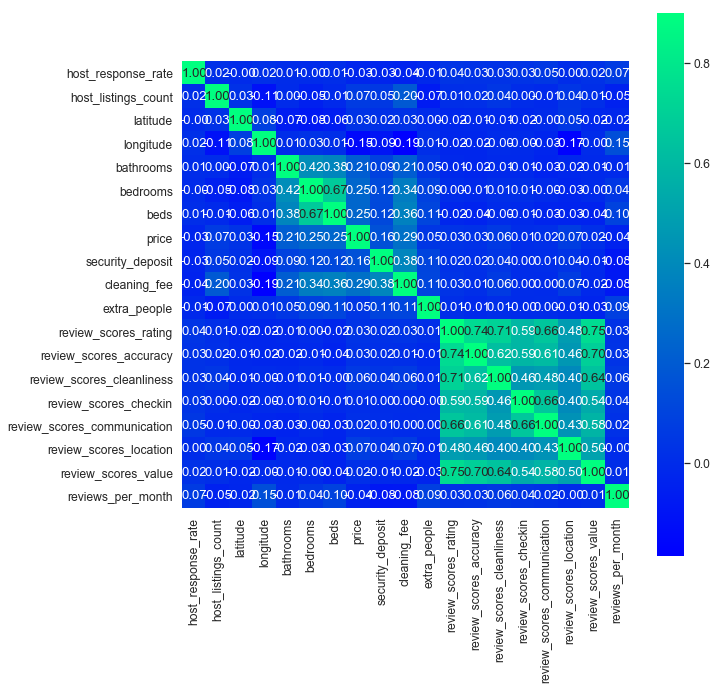

In [51]:
#dimensionality reduction only helps if features are correlated with each other
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.1)
sns.heatmap(corrmat,vmax=0.9,square=True, annot=True, fmt='.2f', cmap = "winter")
plt.show()
#use heatmap to show which features are stronly correlated

This map shows that there are still several features which have stron positive correlations indicating that some of the features may represent redundant information (beds is highly correlated with bedrooms and review scores for different categories are highly correlated with one another). However, this map also shows that there are not high correlations between many of the other attributes, meaning that  comparisons across categories have the potential to provide interesting insights.

### Important features

__Price:__  

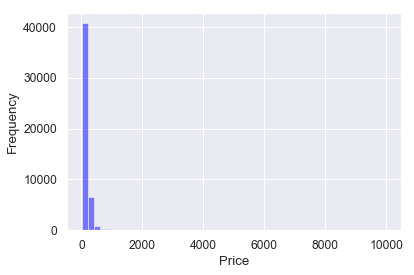

count    48864.000000
mean       151.474664
std        236.576536
min         10.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64
Std Dev:  236.57653562777037


In [52]:
import math
num_bins=50
price=df.iloc[:,4].values
n, bins, patches = plt.hist(df.price, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
#n, bins, patches = plt.hist(np.log(price), num_bins, facecolor='blue', alpha=0.5)
#plt.xlabel('Natural log of Price')
#plt.ylabel('Frequency')
#plt.show()
#print(price)

print(df.price.describe())
stdev = df.price.std()
print('Std Dev: ', stdev)

As shown in the chart above, the prices are skewed right (mean is greater than the median), meaning there are more listings with a price below the average than above. 75% of the prices per night are 175 dollars or less, but there are high-end options up to 10,000 dollars a night. The prices are widely spread, as shown by the large range (99,990) and standard deviation (237). A natural log transformation would normalize the spread if required for modeling.

__Security_deposit:__  

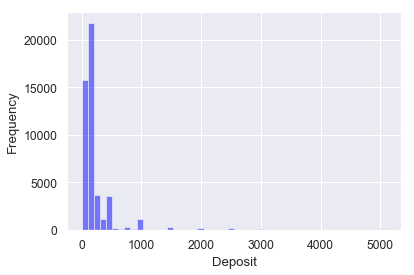

count    48864.000000
mean       221.304969
std        419.419799
min          0.000000
25%        100.000000
50%        120.000000
75%        200.000000
max       5100.000000
Name: security_deposit, dtype: float64

In [53]:
n, bins, patches = plt.hist(df.security_deposit, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Deposit')
plt.ylabel('Frequency')
plt.show()
df.security_deposit.describe()

Like price, security deposit is largely right skewed. One of the listings has a securty deposit that is 25 times as large as the lower 75% of the data. Half of the listings have a security deposit of 120 dollars or less. 

__Beds:__

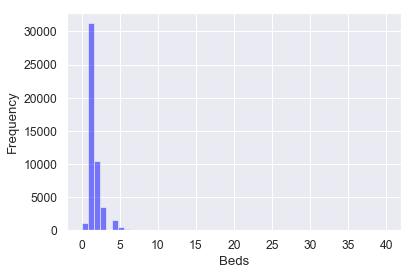

count    48864.000000
mean         1.547602
std          1.111982
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         40.000000
Name: beds, dtype: float64

In [54]:
num_bins=50
beds=df.iloc[:,3].values
n, bins, patches = plt.hist(df.beds, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Beds')
plt.ylabel('Frequency')
plt.show()
df.beds.describe()

75% of the listings have 2 beds or less, with a greater concentration of listings having only one bed available. However, there are 5 listings with over 20 times as many beds as the median number of beds, indicating that this variable is highly skewed. The maximum number of beds a listing has is 40--which is much greater than the average number of 1.5.

__Number of reviews:__  

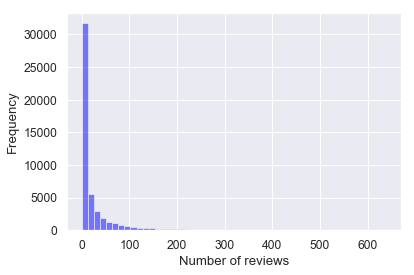

count    48864.000000
mean        23.392191
std         44.939690
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        639.000000
Name: number_of_reviews, dtype: float64

In [55]:
num_bins=50
num_rev=df.iloc[:,8].values
n, bins, patches = plt.hist(sub.number_of_reviews, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Number of reviews')
plt.ylabel('Frequency')
plt.show()
sub.number_of_reviews.describe()

75% of the listings have 24 reviews or less. Some listings, due to either age, popularity, or short term listings, have many more reviews. The most reviews a listing has is 639.

__Reviews Score Rating:__  

C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


count    48864.000000
mean        94.400786
std          7.636545
min         20.000000
25%         93.000000
50%         96.000000
75%         99.000000
max        100.000000
Name: review_scores_rating, dtype: float64
Std Dev:  7.636545344082264


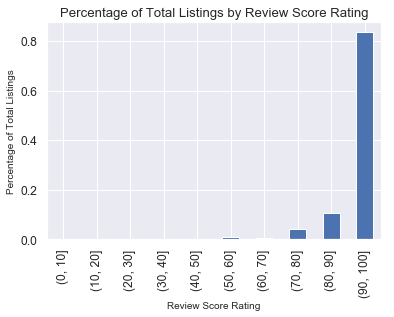

In [56]:
#Score Rating Price
bins = pd.cut(df['review_scores_rating'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

Review_Score_Avg_Price = df.groupby(bins)['review_scores_rating'].agg({'price': 'mean'})
Review_Score_Avg_Price = round(Review_Score_Avg_Price,2)

#Score Rating Percentage
Review_Score_Count = df.groupby(bins)['review_scores_rating'].agg(['count'])
RSC_Percent_of_Total = Review_Score_Count.groupby('review_scores_rating').apply(lambda x:
    float(x.sum())/Review_Score_Count.sum())

Review_Score_Count_Bar = RSC_Percent_of_Total.plot(kind='bar', legend = False, title = 'Percentage of Total Listings by Review Score Rating')
Review_Score_Count_Bar.set_xlabel('Review Score Rating', fontsize=10)
Review_Score_Count_Bar.set_ylabel('Percentage of Total Listings', fontsize=10)

print(df.review_scores_rating.describe())
stdev_r = df.review_scores_rating.std()
print('Std Dev: ', stdev_r)

Most people give positive overall reviews for hosts, as shown by 75% of reviews being over a 9/10. The chart above groups the review score rating by 10-unit intervals and shows the percentage of listings that fall into each rating bucket. Over 80% of all listings receive a score of at least 90 and over 90% score at least an 80. This is valuable from a host's perspective to see that most customers who leave a review had a pleasant exeperence. This also means that customer's who select a listing based on a high volume of positive reviews may also have high expectation for their stay.

## Modeling and Evaluation

### Option A: Cluster Analysis

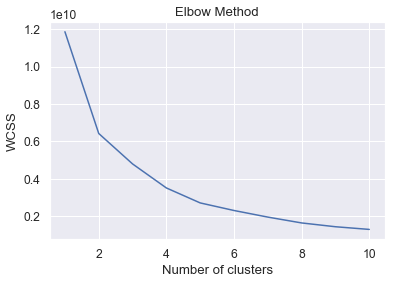

In [57]:
#Reference - https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

#finding best number of clusters
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

wcss = []
#within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We used the Elbow Method to determine a suitable number of clusters. This graphically represents the decrease in distortion as *k* increases. Using the graph above, we decided that k=6 would be the best choice for this dataset.

In [58]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
#kmeans.fit(sub_cont)
pred_y = kmeans.fit_predict(df)

In [59]:
centroids = kmeans.cluster_centers_
labels=kmeans.labels_
print(centroids.shape)
print(kmeans.labels_.shape)
print(df.shape)
print(df.columns)

(6, 19)
(48864,)
(48864, 19)
Index(['host_response_rate', 'host_listings_count', 'latitude', 'longitude',
       'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit',
       'cleaning_fee', 'extra_people', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month'],
      dtype='object')


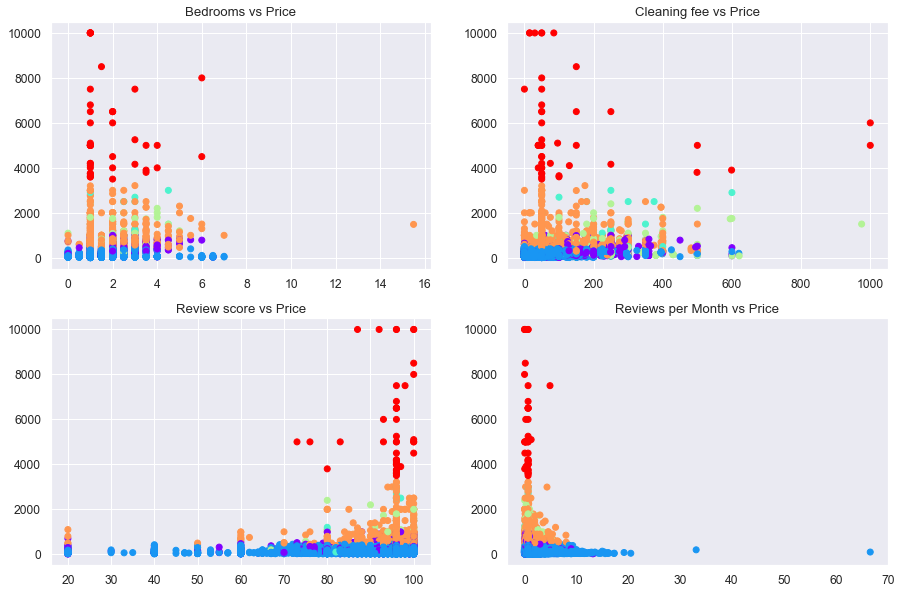

In [100]:
# visualize the data
centroids = kmeans.cluster_centers_
labels=kmeans.labels_
#colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']

fig, axs = plt.subplots(2, 2,figsize=(15,10))
axs[0, 0].scatter(df.iloc[:, 4], df.iloc[:, 7], c=kmeans.labels_, cmap='rainbow')
axs[0, 0].set_title('Bedrooms vs Price')
axs[0, 1].scatter(df.iloc[:, 9], df.iloc[:, 7], c=kmeans.labels_, cmap='rainbow')
axs[0, 1].set_title('Cleaning fee vs Price')
axs[1, 0].scatter(df.iloc[:, 11], df.iloc[:, 7], c=kmeans.labels_, cmap='rainbow')
axs[1, 0].set_title('Review score vs Price')
axs[1, 1].scatter(df.iloc[:, 18], df.iloc[:, 7], c=kmeans.labels_, cmap='rainbow')
axs[1, 1].set_title('Reviews per Month vs Price')

#plt.scatter(df.iloc[:, 2], df.iloc[:, 4], c=kmeans.labels_, cmap='rainbow') #plot the data
#plt.title('K-means clustering for continuous features')
#plt.xlabel('sub, Bedrooms')
#plt.ylabel('sub, Price')
plt.grid()
plt.show()

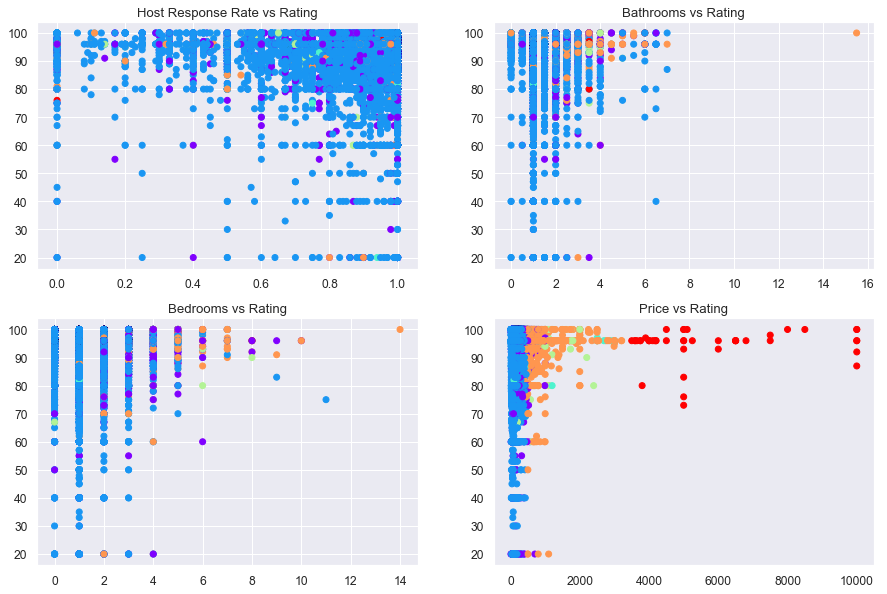

In [101]:
fig, axs = plt.subplots(2, 2,figsize=(15,10))
axs[0, 0].scatter(df.iloc[:, 0], df.iloc[:, 11], c=kmeans.labels_, cmap='rainbow')
axs[0, 0].set_title('Host Response Rate vs Rating')
axs[0, 1].scatter(df.iloc[:, 4], df.iloc[:, 11], c=kmeans.labels_, cmap='rainbow')
axs[0, 1].set_title('Bathrooms vs Rating')
axs[1, 0].scatter(df.iloc[:, 5], df.iloc[:, 11], c=kmeans.labels_, cmap='rainbow')
axs[1, 0].set_title('Bedrooms vs Rating')
axs[1, 1].scatter(df.iloc[:, 7], df.iloc[:, 11], c=kmeans.labels_, cmap='rainbow')
axs[1, 1].set_title('Price vs Rating')

plt.grid()
plt.show()

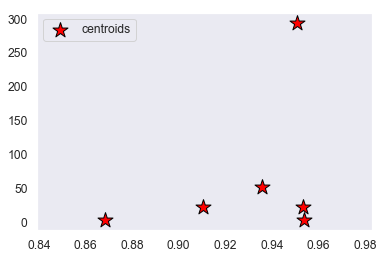

In [84]:
# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [23]:
#getting # of clusters
import numpy as np

np.unique(labels)

array([0, 1, 2, 3, 4, 5])

In [85]:
#creating new cluster_group column in data frame for the labels
import numpy as np

#pd.options.mode.chained_assignment = None
df.is_copy = False

df['cluster_group'] = np.nan
data_length = len(df)
for i in range(data_length):
    df.iloc[i, df.columns.get_loc('cluster_group')] = labels[i]

C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5079: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\jazis\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5080: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


In [86]:
df.head()


,host_response_rate,host_listings_count,latitude,longitude,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,extra_people,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,cluster_group
0,0.9,5.0,40.75362,-73.98377,1.0,0.0,1.0,225.0,350.0,100.0,0.0,95.0,10.0,9.0,10.0,10.0,10.0,9.0,0.39,0.0
1,1.0,1.0,40.80902,-73.94190,1.0,1.0,1.0,150.0,200.0,75.0,20.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0.71,1.0
2,0.9,1.0,40.68514,-73.95976,1.0,1.0,4.0,89.0,500.0,50.0,0.0,90.0,10.0,9.0,10.0,9.0,10.0,9.0,4.64,0.0
3,1.0,1.0,40.79851,-73.94399,1.0,1.0,1.0,80.0,100.0,80.0,20.0,93.0,10.0,9.0,10.0,10.0,9.0,10.0,0.10,1.0
4,0.9,1.0,40.74767,-73.97500,1.0,1.0,1.0,200.0,300.0,125.0,100.0,89.0,10.0,9.0,10.0,10.0,9.0,9.0,0.60,1.0


In [87]:
airbnb_cluster_data = df.groupby(['cluster_group']).mean()
airbnb_cluster_data

,host_response_rate,host_listings_count,latitude,longitude,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,extra_people,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
cluster_group,,,,,,,,,,,,,,,,,,,
0.0,0.953569,22.413498,40.728322,-73.963197,1.200082,1.356214,1.873086,189.597860,607.837366,98.188807,21.055309,94.845432,9.721317,9.513580,9.802798,9.813992,9.711276,9.490206,0.993867
1.0,0.954000,3.444174,40.728177,-73.948661,1.115250,1.112346,1.449138,118.553071,106.093982,52.543070,13.215585,94.275543,9.699938,9.415560,9.804318,9.809157,9.648567,9.538702,1.290551
2.0,0.935682,51.914773,40.733750,-73.971764,1.386364,1.659091,2.068182,388.613636,4605.454545,149.454545,27.982955,94.869318,9.738636,9.619318,9.806818,9.795455,9.818182,9.562500,0.795511
3.0,0.910263,21.429594,40.739678,-73.967245,1.344272,1.588305,2.134845,284.183771,2043.060859,153.781623,24.078759,95.405728,9.794749,9.650358,9.843675,9.854415,9.784010,9.532220,0.672912
4.0,0.950717,294.136490,40.736708,-73.981269,1.546309,1.782730,2.486072,635.352368,202.945682,124.363510,11.098886,95.380223,9.780641,9.746518,9.855153,9.844011,9.883008,9.648329,0.918433
5.0,0.868182,2.159091,40.728753,-73.973240,1.840909,2.068182,2.886364,5769.250000,729.590909,144.409091,22.500000,94.727273,9.818182,9.750000,9.659091,9.772727,9.772727,9.772727,0.617045


In [88]:
#adding counts
airbnb_cluster_data['Counts'] = pd.Series(df.groupby(['cluster_group']).size())
airbnb_cluster_data

,host_response_rate,host_listings_count,latitude,longitude,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,extra_people,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,Counts
cluster_group,,,,,,,,,,,,,,,,,,,,
0.0,0.953569,22.413498,40.728322,-73.963197,1.200082,1.356214,1.873086,189.597860,607.837366,98.188807,21.055309,94.845432,9.721317,9.513580,9.802798,9.813992,9.711276,9.490206,0.993867,6075
1.0,0.954000,3.444174,40.728177,-73.948661,1.115250,1.112346,1.449138,118.553071,106.093982,52.543070,13.215585,94.275543,9.699938,9.415560,9.804318,9.809157,9.648567,9.538702,1.290551,40295
2.0,0.935682,51.914773,40.733750,-73.971764,1.386364,1.659091,2.068182,388.613636,4605.454545,149.454545,27.982955,94.869318,9.738636,9.619318,9.806818,9.795455,9.818182,9.562500,0.795511,176
3.0,0.910263,21.429594,40.739678,-73.967245,1.344272,1.588305,2.134845,284.183771,2043.060859,153.781623,24.078759,95.405728,9.794749,9.650358,9.843675,9.854415,9.784010,9.532220,0.672912,838
4.0,0.950717,294.136490,40.736708,-73.981269,1.546309,1.782730,2.486072,635.352368,202.945682,124.363510,11.098886,95.380223,9.780641,9.746518,9.855153,9.844011,9.883008,9.648329,0.918433,1436
5.0,0.868182,2.159091,40.728753,-73.973240,1.840909,2.068182,2.886364,5769.250000,729.590909,144.409091,22.500000,94.727273,9.818182,9.750000,9.659091,9.772727,9.772727,9.772727,0.617045,44


Looking at feature means for each cluster.

In [89]:
pd.set_option('display.max_columns', None)
df[ df['cluster_group'] == 0 ].describe()

,host_response_rate,host_listings_count,latitude,longitude,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,extra_people,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,cluster_group
count,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.0
mean,0.953569,22.413498,40.728322,-73.963197,1.200082,1.356214,1.873086,189.597860,607.837366,98.188807,21.055309,94.845432,9.721317,9.513580,9.802798,9.813992,9.711276,9.490206,0.993867,0.0
std,0.133870,73.708674,0.048481,0.039383,0.494296,0.949252,1.322729,122.479979,217.284099,57.967697,31.885841,7.350887,0.715001,0.913048,0.653472,0.661243,0.653198,0.859218,1.157370,0.0
min,0.000000,0.000000,40.508680,-74.239860,0.000000,0.000000,0.000000,11.000000,325.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.010000,0.0
25%,0.990000,1.000000,40.693395,-73.987380,1.000000,1.000000,1.000000,110.000000,500.000000,50.000000,0.000000,94.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,0.220000,0.0
50%,1.000000,1.000000,40.725870,-73.966850,1.000000,1.000000,1.000000,160.000000,500.000000,100.000000,10.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.710000,0.0
75%,1.000000,3.000000,40.760670,-73.947280,1.000000,2.000000,2.000000,236.000000,750.000000,128.000000,30.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.190000,0.0
max,1.000000,435.000000,40.911690,-73.727630,6.500000,10.000000,15.000000,1000.000000,1325.000000,600.000000,300.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,13.190000,0.0


In [90]:
pd.set_option('display.max_columns', None)
df[ df['cluster_group'] == 2 ].describe()

,host_response_rate,host_listings_count,latitude,longitude,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,extra_people,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,cluster_group
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.0
mean,0.935682,51.914773,40.733750,-73.971764,1.386364,1.659091,2.068182,388.613636,4605.454545,149.454545,27.982955,94.869318,9.738636,9.619318,9.806818,9.795455,9.818182,9.562500,0.795511,2.0
std,0.160077,132.131703,0.042114,0.035563,0.722010,1.057073,1.412560,525.764835,569.927382,92.125493,55.340966,8.131770,0.861816,0.846824,0.761321,0.780609,0.524714,0.929862,0.857916,0.0
min,0.000000,0.000000,40.608690,-74.018370,1.000000,0.000000,0.000000,30.000000,3500.000000,0.000000,0.000000,20.000000,2.000000,4.000000,2.000000,2.000000,6.000000,2.000000,0.020000,2.0
25%,0.940000,1.000000,40.713095,-73.992313,1.000000,1.000000,1.000000,139.500000,4000.000000,87.500000,0.000000,95.000000,10.000000,9.750000,10.000000,10.000000,10.000000,9.000000,0.250000,2.0
50%,1.000000,1.000000,40.732925,-73.980315,1.000000,1.000000,2.000000,220.000000,5000.000000,150.000000,0.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.710000,2.0
75%,1.000000,3.250000,40.760510,-73.959662,1.500000,2.000000,3.000000,350.000000,5000.000000,200.000000,35.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.725000,2.0
max,1.000000,435.000000,40.879000,-73.785830,4.500000,5.000000,9.000000,2999.000000,5100.000000,600.000000,300.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.290000,2.0


In [91]:
pd.set_option('display.max_columns', None)
df[ df['cluster_group'] == 3 ].describe()

,host_response_rate,host_listings_count,latitude,longitude,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,extra_people,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,cluster_group
count,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.0
mean,0.910263,21.429594,40.739678,-73.967245,1.344272,1.588305,2.134845,284.183771,2043.060859,153.781623,24.078759,95.405728,9.794749,9.650358,9.843675,9.854415,9.784010,9.532220,0.672912,3.0
std,0.172193,63.407609,0.047594,0.038950,0.638685,1.156234,1.600389,280.721799,505.157992,102.812917,44.624904,6.502095,0.695348,0.765563,0.568510,0.535746,0.594585,0.858321,0.702145,0.0
min,0.000000,0.000000,40.579330,-74.121520,0.000000,0.000000,0.000000,10.000000,1350.000000,0.000000,0.000000,40.000000,2.000000,4.000000,4.000000,4.000000,4.000000,2.000000,0.010000,3.0
25%,0.900000,1.000000,40.713743,-73.992472,1.000000,1.000000,1.000000,125.000000,1500.000000,80.000000,0.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,0.160000,3.0
50%,1.000000,2.000000,40.742175,-73.975200,1.000000,1.000000,2.000000,200.000000,2000.000000,150.000000,0.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.710000,3.0
75%,1.000000,8.000000,40.765828,-73.953960,1.500000,2.000000,3.000000,325.000000,2500.000000,200.000000,35.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.710000,3.0
max,1.000000,760.000000,40.901750,-73.748590,5.000000,8.000000,16.000000,2400.000000,3300.000000,975.000000,300.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.870000,3.0


In [92]:
pd.set_option('display.max_columns', None)
df[ df['cluster_group'] == 1 ].describe()

,host_response_rate,host_listings_count,latitude,longitude,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,extra_people,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,cluster_group
count,40295.00000,40295.000000,40295.000000,40295.000000,40295.000000,40295.000000,40295.000000,40295.000000,40295.000000,40295.000000,40295.000000,40295.000000,40295.000000,40295.000000,40295.000000,40295.000000,40295.000000,40295.000000,40295.000000,40295.0
mean,0.95400,3.444174,40.728177,-73.948661,1.115250,1.112346,1.449138,118.553071,106.093982,52.543070,13.215585,94.275543,9.699938,9.415560,9.804318,9.809157,9.648567,9.538702,1.290551,1.0
std,0.14191,11.859479,0.056375,0.047306,0.373904,0.631647,0.949506,75.567868,83.713055,37.058247,21.798980,7.725819,0.766133,1.020518,0.639294,0.650042,0.706112,0.835734,1.602137,0.0
min,0.00000,0.000000,40.499790,-74.244420,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.010000,1.0
25%,1.00000,1.000000,40.688580,-73.980395,1.000000,1.000000,1.000000,65.000000,0.000000,30.000000,0.000000,93.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.280000,1.0
50%,1.00000,1.000000,40.721030,-73.952940,1.000000,1.000000,1.000000,99.000000,120.000000,50.000000,0.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.710000,1.0
75%,1.00000,2.000000,40.763590,-73.931170,1.000000,1.000000,2.000000,150.000000,120.000000,60.000000,20.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.690000,1.0
max,1.00000,363.000000,40.912400,-73.712990,7.000000,11.000000,22.000000,500.000000,375.000000,620.000000,300.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,66.610000,1.0


In [93]:
pd.set_option('display.max_columns', None)
df[ df['cluster_group'] == 4 ].describe()

,host_response_rate,host_listings_count,latitude,longitude,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,extra_people,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,cluster_group
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.0
mean,0.950717,294.136490,40.736708,-73.981269,1.546309,1.782730,2.486072,635.352368,202.945682,124.363510,11.098886,95.380223,9.780641,9.746518,9.855153,9.844011,9.883008,9.648329,0.918433,4.0
std,0.145449,389.227514,0.036169,0.032003,0.888827,1.466041,2.341077,461.141332,188.531889,75.807469,28.870828,6.660215,0.815316,0.806650,0.626851,0.677698,0.503884,0.868900,0.983942,0.0
min,0.000000,0.000000,40.530760,-74.202950,0.000000,0.000000,0.000000,109.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.010000,4.0
25%,0.960000,1.000000,40.715550,-73.998930,1.000000,1.000000,1.000000,314.000000,120.000000,50.000000,0.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.640000,4.0
50%,1.000000,4.000000,40.741100,-73.985750,1.000000,1.000000,2.000000,500.000000,120.000000,120.000000,0.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.710000,4.0
75%,1.000000,755.000000,40.760800,-73.972698,2.000000,2.000000,3.000000,750.000000,250.000000,150.000000,5.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.710000,4.0
max,1.000000,1465.000000,40.886710,-73.741300,15.500000,14.000000,40.000000,3210.000000,1200.000000,500.000000,300.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.050000,4.0


In [94]:
df_all = pd.concat([df,sub.name, 
sub.host_id, 
sub.host_name, 
sub.host_since, 
sub.host_location, 
sub.host_response_time, 
sub.host_is_superhost, 
sub.host_neighbourhood, 
sub.host_verifications, 
sub.host_has_profile_pic, 
sub.host_identity_verified, 
sub.street, 
sub.neighbourhood, 
sub.neighbourhood_cleansed, 
sub.neighbourhood_group_cleansed, 
sub.city, 
sub.state, 
sub.zipcode, 
sub.market, 
sub.smart_location, 
sub.is_location_exact, 
sub.property_type, 
sub.room_type, 
sub.accommodates, 
sub.bed_type, 
sub.guests_included, 
sub.minimum_nights, 
sub.maximum_nights, 
sub.calendar_updated, 
sub.availability_60, 
sub.calendar_last_scraped, 
sub.number_of_reviews, 
sub.number_of_reviews_ltm, 
sub.first_review, 
sub.last_review, 
sub.instant_bookable, 
sub.cancellation_policy, 
sub.require_guest_profile_picture, 
sub.require_guest_phone_verification, 
sub.calculated_host_listings_count_entire_homes, 
sub.calculated_host_listings_count_private_rooms],axis=1)

In [95]:
df_all.head()

,host_response_rate,host_listings_count,latitude,longitude,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,extra_people,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,cluster_group,name,host_id,host_name,host_since,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,is_location_exact,property_type,room_type,accommodates,bed_type,guests_included,minimum_nights,maximum_nights,calendar_updated,availability_60,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,0.9,5.0,40.75362,-73.98377,1.0,0.0,1.0,225.0,350.0,100.0,0.0,95.0,10.0,9.0,10.0,10.0,10.0,9.0,0.39,0.0,Skylit Midtown Castle,2845,Jennifer,2008-09-09,"New York, New York, United States",within a few hours,f,Midtown,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,"New York, NY, United States",Midtown,Midtown,Manhattan,New York,NY,10018,New York,"New York, NY",f,Apartment,Entire home/apt,2,Real Bed,2,1,1125,a week ago,17,2019-08-07,46,12,2009-11-21,2019-07-14,f,strict_14_with_grace_period,t,t,1,0
1,1.0,1.0,40.80902,-73.94190,1.0,1.0,1.0,150.0,200.0,75.0,20.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0.71,1.0,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,2008-11-25,"New York, New York, United States",within a day,f,Harlem,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"New York, NY, United States",Harlem,Harlem,Manhattan,New York,NY,10027,New York,"New York, NY",t,Apartment,Private room,2,Pull-out Sofa,2,3,7,35 months ago,60,2019-08-06,0,0,2019-08-01,2019-08-01,f,strict_14_with_grace_period,t,t,0,1
2,0.9,1.0,40.68514,-73.95976,1.0,1.0,4.0,89.0,500.0,50.0,0.0,90.0,10.0,9.0,10.0,9.0,10.0,9.0,4.64,0.0,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,2008-12-07,"New York, New York, United States",within an hour,f,Clinton Hill,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn, NY, United States",Brooklyn,Clinton Hill,Brooklyn,Brooklyn,NY,11238,New York,"Brooklyn, NY",t,Guest suite,Entire home/apt,3,Real Bed,1,1,730,today,1,2019-08-06,274,70,2014-09-30,2019-07-26,f,moderate,f,f,1,0
3,1.0,1.0,40.79851,-73.94399,1.0,1.0,1.0,80.0,100.0,80.0,20.0,93.0,10.0,9.0,10.0,10.0,9.0,10.0,0.10,1.0,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,2009-01-29,"Miami, Florida, United States",NaN,f,East Harlem,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"New York, NY, United States",East Harlem,East Harlem,Manhattan,New York,NY,10029,New York,"New York, NY",t,Apartment,Entire home/apt,1,Real Bed,1,10,120,4 months ago,0,2019-08-06,9,2,2012-03-20,2018-11-19,f,strict_14_with_grace_period,t,t,1,0
4,0.9,1.0,40.74767,-73.97500,1.0,1.0,1.0,200.0,300.0,125.0,100.0,89.0,10.0,9.0,10.0,10.0,9.0,9.0,0.60,1.0,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,2009-02-02,"New York, New York, United States",within a few hours,f,Flatiron District,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,"New York, NY, United States",Midtown East,Murray Hill,Manhattan,New York,NY,10016,New York,"New York, NY",f,Apartment,Entire home/apt,2,Real Bed,2,3,21,4 days ago,33,2019-08-06,75,10,2009-04-20,2019-07-21,f,strict_14_with_grace_period,t,t,1,0


In [ ]:
##Still need to update with different variables.
fig, axs = plt.subplots(2, 2,figsize=(15,10))
axs[0, 0].scatter(df.iloc[:, 0], df.iloc[:, 9], c=kmeans.labels_, cmap='rainbow')
axs[0, 0].set_title('Accommodates vs Rating')
axs[0, 1].scatter(df.iloc[:, 1], df.iloc[:, 9], c=kmeans.labels_, cmap='rainbow')
axs[0, 1].set_title('Bathrooms vs Rating')
axs[1, 0].scatter(df.iloc[:, 2], df.iloc[:, 9], c=kmeans.labels_, cmap='rainbow')
axs[1, 0].set_title('Bedrooms vs Rating')
axs[1, 1].scatter(df.iloc[:, 4], df.iloc[:, 9], c=kmeans.labels_, cmap='rainbow')
axs[1, 1].set_title('Price vs Rating')

plt.grid()
plt.show()

0        100.0
1         75.0
2         50.0
3         80.0
4        125.0
5          0.0
6         15.0
7         50.0
8         75.0
9         40.0
10        75.0
11        50.0
12        67.0
13       100.0
14        90.0
15        50.0
16         0.0
17        70.0
18        50.0
19       120.0
20        15.0
21        10.0
22        90.0
23        35.0
24        25.0
25        25.0
26       100.0
27        15.0
28        50.0
29         0.0
         ...  
48834    250.0
48835     20.0
48836     50.0
48837     50.0
48838     20.0
48839     50.0
48840    129.0
48841    195.0
48842     30.0
48843    150.0
48844     50.0
48845     50.0
48846     95.0
48847    100.0
48848    100.0
48849     20.0
48850    200.0
48851     25.0
48852     20.0
48853    200.0
48854     50.0
48855     20.0
48856     18.0
48857     90.0
48858    100.0
48859     50.0
48860     50.0
48861      0.0
48862     40.0
48863     25.0
Name: cleaning_fee, Length: 48864, dtype: float64

### Cluster Analysis
__Cluster 1: Communicative hosts and upscale accommodations__
The mean price of these listings was second highest compared to the other clusters, yet with the highest mean security deposit and similar accommatation offerings (number of beds, baths, guests accommodated, etc.). The higher security deposit and price compared to similar listings can indicate that the listing is nicer, more stocked, or newly renovated to justify the difference in price.

This cluster had hosts with the highest review ratings and most number of reviews. Communication and check-in scores in particular were highest, likely driving good overall review scores and attracting other users.

__Cluster 2: The more the merrier__
This cluster has accommodations for the most guests, including the greatest mean values of beds, bathrooms, private rooms, and guests, driving this cluster to have the greatest rental price compared to the other clusters. The security deposit is low, however, suggesting that the price is not as influenced by listing features as Cluster 1.

__Cluster 3: Experienced hosts, low price__
Cluster 3 has hosts who have the most total listings on average. 
The listings themselves have accommodations that are on par with the averages of the other clusters, as well as review scores. 
The mean price is second lowest, and it has the lowest mean security-deposit. 

__Cluster 4: Bang for your buck__
This cluster has the second largest accommodations on average, but at the second lowest price--a great deal for large groups. Additionally, it has the most reviews for long term leases, suggesting that these listings attract long term customers.

However, this cluster has the lowest review scores, perhaps driven by the low cleanliness scores. There is a tradeoff between price and satisfaction.

__Cluster 5: Solo guests__
This cluster has mean lowest price and the smallest accommodations (beds, bathrooms, guests). This cluster features listings that are best suited for 1-2 guests.

__Cluster 6:__
This cluster contains a single observation and should not be considered with the other clusters.


### Agglomerative Hierarchical Clustering

#### Variable Correlation Plot with Dendrogram using the correlation as metric

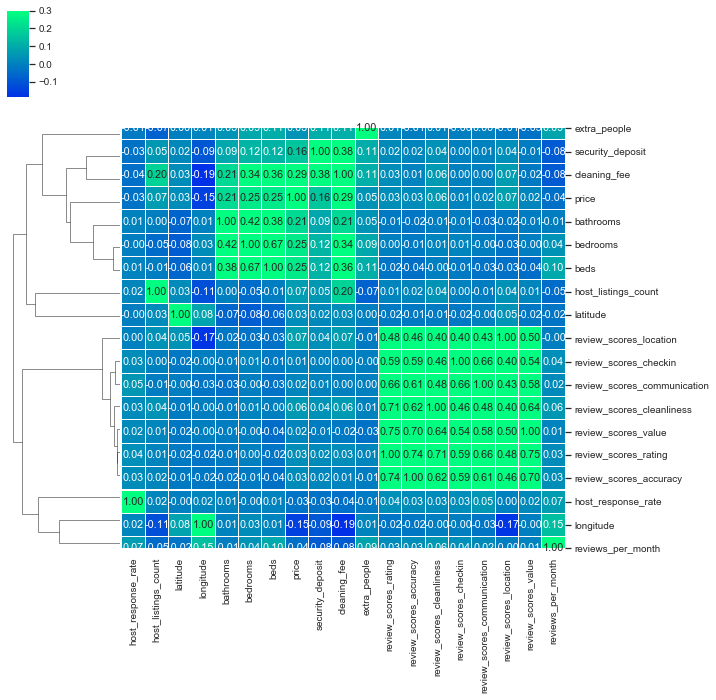

In [11]:
corrmat = df.corr()

sns.set(font_scale=0.9)

cg = sns.clustermap(corrmat,col_cluster=False,vmax=0.3, center=0, square=True, annot=True, fmt='.2f', cmap = "winter", linewidths = 0.1, metric="correlation"); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 

cg 

Dendrogram using correlation as matric to illustrate the clustering relationship between vairables.

what happen if we don't set max on the tree split and use the max splits as the number of clusters?

In [120]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn import ensemble
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor as RFR

#### <b>The dendrogram portion down below takes the longest to run. Estimated ~4 minutes</b>

In [145]:
#calculate time complexity using the agglomerative clustering method
import pandas as pd 
import math
O = len(df.index)
TC = (O**2)*(math.log10(O))
print("Time complexity for using Agglomerative Hierarchical Clustering: " , TC , " where time complexity is the system clock cycle.")

Time complexity for using Agglomerative Hierarchical Clustering:  11195854507.862453  where time complexity is the system clock cycle.


In [136]:
#take absolute function to turn all longitude into positive continuous numbers
#alternatively we could subset and drop longitude. NYC has longitude of ~ 74 W much insight 
#could also drop latitude since the objectives are price and review scores
df1=df
df1.longitude = df1.longitude.abs()
df1.head()

C:\Users\Yat\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,host_response_rate,host_listings_count,latitude,longitude,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,extra_people,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,cluster_group
0,0.9,5.0,40.75362,73.98377,1.0,0.0,1.0,225.0,350.0,100.0,0.0,95.0,10.0,9.0,10.0,10.0,10.0,9.0,0.39,0.0
1,1.0,1.0,40.80902,73.94190,1.0,1.0,1.0,150.0,200.0,75.0,20.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0.71,1.0
2,0.9,1.0,40.68514,73.95976,1.0,1.0,4.0,89.0,500.0,50.0,0.0,90.0,10.0,9.0,10.0,9.0,10.0,9.0,4.64,0.0
3,1.0,1.0,40.79851,73.94399,1.0,1.0,1.0,80.0,100.0,80.0,20.0,93.0,10.0,9.0,10.0,10.0,9.0,10.0,0.10,1.0
4,0.9,1.0,40.74767,73.97500,1.0,1.0,1.0,200.0,300.0,125.0,100.0,89.0,10.0,9.0,10.0,10.0,9.0,9.0,0.60,1.0


In [137]:
#https://medium.com/datadriveninvestor/unsupervised-learning-with-python-k-means-and-hierarchical-clustering-f36ceeec919c
#standardize the data to normal distribution
from sklearn import preprocessing
df1_standardized = preprocessing.scale(df1)
df1_standardized = pd.DataFrame(df1_standardized)

#### Re-run K-mean clustering from before

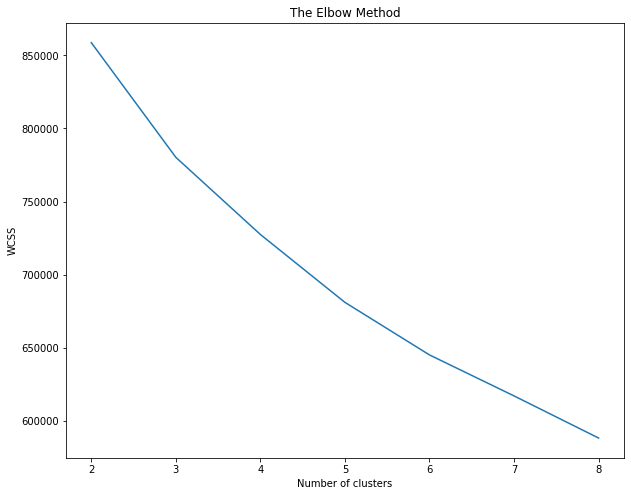

In [169]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df1_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 9), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [140]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df1_standardized)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
df1['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(df1.groupby('cluster').mean(),3))
kmeans_mean_cluster

C:\Users\Yat\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,host_response_rate,host_listings_count,latitude,longitude,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,extra_people,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,cluster_group
cluster,,,,,,,,,,,,,,,,,,,,
1,0.957,5.362,40.717,73.955,1.620,2.549,3.511,246.714,291.020,117.063,21.827,95.688,9.804,9.622,9.900,9.896,9.712,9.620,1.350,0.684
2,0.967,811.190,40.742,73.992,1.132,0.908,1.374,288.104,207.219,142.059,1.687,95.689,9.898,9.877,9.920,9.867,9.924,9.732,0.596,3.992
3,0.938,6.786,40.731,73.951,1.121,1.054,1.412,110.861,161.967,52.957,13.281,85.559,8.885,8.212,9.270,9.273,9.095,8.606,0.934,0.910
4,0.924,15.297,40.731,73.947,1.180,1.146,1.554,121.849,206.937,60.861,12.383,51.060,5.485,5.297,6.503,6.128,7.181,5.392,0.467,0.995
5,0.927,25.836,40.737,73.973,1.540,1.866,2.461,672.834,1403.898,135.627,20.612,96.119,9.859,9.750,9.891,9.903,9.869,9.665,0.876,3.418
6,0.951,6.549,40.729,73.961,1.060,0.961,1.213,122.270,170.205,54.805,11.651,96.834,9.933,9.732,9.953,9.971,9.855,9.808,0.709,0.876
7,0.979,2.805,40.728,73.910,1.075,1.061,1.475,95.484,116.247,41.547,20.439,95.535,9.839,9.603,9.924,9.920,9.580,9.605,3.616,0.950


#### Warning: This dendrogram portion takes a very long time to run

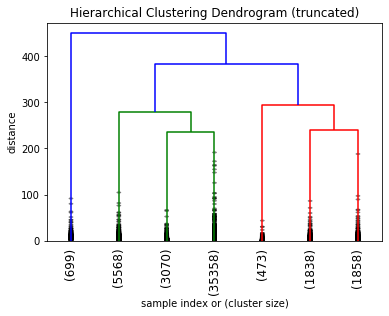

In [141]:
# Hierarchical clustering 
# creating a dataset for hierarchical clustering
df2_standardized = df1_standardized

# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
#creating the linkage matrix
H_cluster = linkage(df2_standardized,'ward') #ward
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=7,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)

plt.show()

For the dendrogram, the split was set at 7 based on the centriod plot we had earlier.
<br>
<br>
<i>
https://stats.stackexchange.com/questions/195446/choosing-the-right-linkage-method-for-hierarchical-clustering
</i>
<br>
<br>
<i><b>excerpt from article</b></i>
<br>
<br>
<mark>Ward's method is the closest, by it properties and efficiency, to K-means clustering; they share the same objective function - minimization of the pooled within-cluster SS "in the end".</mark> Of course, K-means (being iterative and if provided with decent initial centroids) is usually a better minimizer of it than Ward. However, Ward seems to me a bit more accurate than K-means in uncovering clusters of uneven physical sizes (variances) or clusters thrown about space very irregularly. MIVAR method is weird to me, I can't imagine when it could be recommended, it doesn't produce dense enough clusters.



In [163]:
df2_standardized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.372933,-0.111383,0.455455,0.687339,-0.333577,-1.572841,-0.492460,0.310792,0.306844,0.749296,-0.586521,0.078467,0.385372,-0.442613,0.302633,0.289557,0.481043,-0.637728,-0.548692,-1.458099
1,0.331291,-0.156720,1.466519,-0.214265,-0.333577,-0.232381,-0.492460,-0.006233,-0.050797,0.249811,0.229457,0.209418,0.385372,0.557565,0.302633,0.289557,0.481043,0.551886,-0.339604,-0.007747
2,-0.372933,-0.156720,-0.794322,0.170322,-0.333577,-0.232381,2.205453,-0.264081,0.664484,-0.249674,-0.586521,-0.576286,0.385372,-0.442613,0.302633,-1.246366,0.481043,-0.637728,2.228260,-1.458099
3,0.331291,-0.156720,1.274709,-0.169260,-0.333577,-0.232381,-0.492460,-0.302124,-0.289224,0.349708,0.229457,-0.183434,0.385372,-0.442613,0.302633,0.289557,-0.960492,0.551886,-0.738178,-0.007747
4,-0.372933,-0.156720,0.346866,0.498491,-0.333577,-0.232381,-0.492460,0.205117,0.187630,1.248781,3.493372,-0.707236,0.385372,-0.442613,0.302633,0.289557,-0.960492,-0.637728,-0.411478,-0.007747


In [143]:
# New Dataframe called cluster
cluster_Hierarchical = pd.DataFrame(cluster_2)
# Adding the hierarchical clustering to dataset

df2=df1
df2['cluster'] = cluster_Hierarchical


C:\Users\Yat\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [144]:
pd.DataFrame(round(df2.groupby('cluster').mean(),3))

,host_response_rate,host_listings_count,latitude,longitude,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,extra_people,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,cluster_group
cluster,,,,,,,,,,,,,,,,,,,,
1,0.938,11.871,40.732,73.948,1.173,1.093,1.465,115.413,197.220,57.674,11.300,55.682,5.878,5.564,6.757,6.571,7.504,5.861,0.452,0.969
2,0.971,4.621,40.728,73.955,1.051,1.114,1.490,119.483,147.854,55.812,12.761,87.019,9.071,8.405,9.235,9.235,9.301,8.812,0.926,0.940
3,0.548,3.064,40.722,73.956,1.080,1.059,1.315,128.586,131.390,55.579,13.569,95.428,9.823,9.529,9.874,9.883,9.787,9.675,0.762,0.942
4,0.986,6.379,40.729,73.949,1.098,1.074,1.408,122.267,174.803,55.191,14.581,96.097,9.862,9.648,9.942,9.954,9.742,9.701,1.356,0.865
5,0.968,823.233,40.741,73.991,1.136,0.918,1.374,283.825,196.744,142.808,1.755,95.552,9.873,9.863,9.905,9.841,9.909,9.708,0.592,4.000
6,0.965,4.230,40.718,73.958,2.088,2.979,4.122,322.774,320.330,148.069,18.653,95.359,9.738,9.577,9.863,9.844,9.673,9.578,1.327,0.807
7,0.927,31.420,40.737,73.973,1.456,1.743,2.294,651.403,1392.277,129.708,16.791,95.875,9.837,9.713,9.882,9.892,9.866,9.642,0.866,3.420


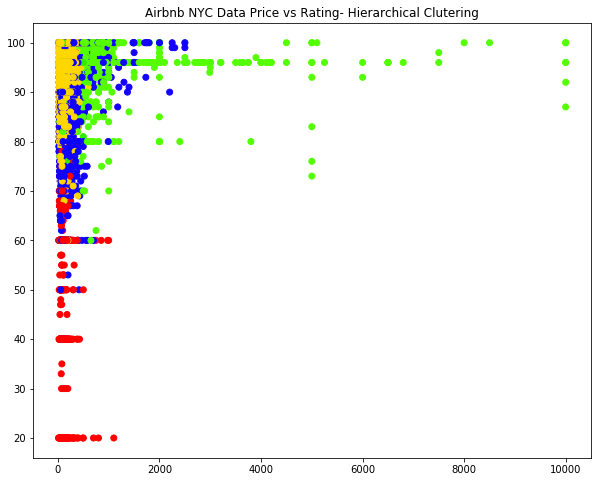

In [167]:
k=7
cluster_2 = fcluster(H_cluster, k, criterion='maxclust')
cluster_2[0:30:,]
plt.figure(figsize=(10, 8))
plt.scatter(df2.iloc[:,7], df2.iloc[:,11],c=cluster_2, cmap='prism')  # plot points with cluster dependent colors
plt.title('Airbnb NYC Data Price vs Rating- Hierarchical Clutering')
plt.show()

Based on the centroid plot above, we chose to split the data into 7 clusters for the agglomerative clustering method.  Using the Elbow method, it showed that there weren't any significant gains on increaing the cluster separation beyond 7 clusters.

We also took the absolute function and turned the longitude into a positive continuous variable as we know that NYC has a longitude of ~74&deg;W. There was no change in the latitude variable as that was already a positive continuous variable.

Since the obejctive is to classify clusters based on review score rating or price, we could potentially omit the latitude variable (for reference NYC has a latitude of ~40.7&deg;N ) along with the longitude since all data points were taken from the NYC area. Disregard the geo-coordinates variables could potentially yield a different classification if we base the cluster analysis on other features/variables.


### Clusters Analysis
#### Cluster 1: (On a Budget, i.e. apartments)
Cluster 1 has the <u>lowest mean price of 115.413</u>. The cluster also has the third highest security deposite average of 197.220 and fourth highest in cleaning fee of 57.674. <mark>Average review scores rating</mark> for this cluster is 55.682 <mark>(Ranked Last)</mark>.

In terms of accommodation features, this cluster is a typical 1 bedroom 1 bathroom unit (1.093 bedrooms and 1.173 bathrooms) with 1.465 beds. Cluster 1 can accomodate roughly 1 <i>(11.3)</i> extra people on average. 

#### Cluster 2:
Cluster 2 has the <u>second lowest mean price of 119.483</u>. The cluster also has the second lowest security deposite average of 147.854 and third lowest in cleaning fee of 55.812. <mark>Average review scores rating</mark> for this cluster is 87.019 <mark>(Ranked Sixth)</mark>.

In terms of accommodation features, this cluster another type of 1 bed /1 bathroom unit (1.114 bedrooms and 1.051 bathrooms) with 1.490 beds. Cluster 2 can accomodate roughly 13 <i>(12.761)</i> extra people on average.

#### Cluster 3:
Cluster 3 has the fourth highest mean price of 128.586. The cluster also has the lowest security deposite average of 131.390 and <u>second lowest in cleaning fee of 55.579</u>. <mark>Average review scores rating</mark> for this cluster is 95.428 <mark>(Ranked Fourth)</mark>.

In terms of accommodation features, this cluster is similar to cluster 1 and 2, with 1.059 bedrooms and 1.080 bathrooms and 1.315 beds. Cluster 3 can accomodate roughly 14 <i>(13.569)</i> extra people on average.

#### Cluster 4: (Middle-of-the-road, i.e. Holiday Inn) <em>Our most popular option</em>
Cluster 4 has the fifth highest mean price of 122.267. The cluster also has fifth highest security deposite average of 174.803 and the <u>lowest in cleaning fee of 55.191</u>. <mark>Average review scores rating</mark> for this cluster is 96.097 <mark>(Ranked First)</mark>.

In terms of accommodation features, this cluster on average has1.074 bedrooms and 1.098 bathrooms with 1.408 beds. Cluster 5 can accomodate roughly 15 <i>(14.581)</i> extra people on average.

#### Cluster 5: 
Cluster 5 has the third highest mean price of 283.8. The cluster also has the fourth highest security deposite average of 196.744 and <u>second highest in cleaning fee of 142.808</u>. <mark>Average review scores rating</mark> for this cluster is 95.552 <mark>(Ranked Third)</mark>.

In terms of accommodation features, this cluster on average has 0.918 bedrooms and 1.136 bathrooms with 1.374 beds. Cluster 5 can accomodate roughly 2 <i>(1.755)</i> extra people on average.

#### Cluster 6: 
Cluster 6 has the <u>second highest mean price of 322.774</u>. The cluster also has the second highest security deposite average of 320.330 and the<u> highest in cleaning fee of 148.069</u>. <mark>Average review scores rating</mark> for this cluster is 95.359 <mark>(Ranked Fifth)</mark>.

In terms of accommodation features, this cluster on average has the most bedrooms and bathrooms (1.3 bedrooms and 1.4 bathrooms) with 1.9 beds. Cluster 6 can accomodate roughly 19 <i>(18.653)</i> extra people on average.

#### Cluster 7: (Pestige Elite, i.e. boutique 5-star hotels, yachts, houses etc)
Cluster 7 has the <u>highest mean price of 651.403</u>. The cluster also has the highest security deposite average of 1392.277 and third highest in cleaning fee of 129.708. <mark>Average review scores rating</mark> for this cluster is 95.875 <mark>(Ranked Second)</mark>.

In terms of accommodation features, this cluster on average has 1.743 bedrooms with 1.456 bathrooms and 2.294 beds. Cluster 7 can accomodate 17 <i>(16.791)</i> extra people on average.




__Assessing Cluster Analysis__  


### Deployment: 

 - This model can help hosts understand what factors contribute most to a high review score (especially since the model is more accurate at predicting high scores), allowing hosts to become more hospitable
 - The model value can be measured by tracking trends of the host's review score over time to see if they have made improvements
 - This model would be best deployed on the host's view of their profile so they can manage their accomodations to be competitive to others in the market
 - The model would not have to be updated frequently because it predicts an aggregate score; a quarterly refresh is reasonable
 - Other beneficial data to collect is whether guests are repeat visitor's or not; this would most likely skew results positively